<a href="https://colab.research.google.com/github/Chandan0731/bioinformatics_lab/blob/main/Experiment_3_medical_img_retrival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pydicom matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 32.7 MB/s eta 0:00:00


Downloading...
From: https://drive.google.com/uc?export=download&confirm=pbef&id=1Mafu1sTobziya-n-MFCJeR8QftigKhDG
To: /content/Sampledata_5A.zip
100%|██████████| 5.45M/5.45M [00:00<00:00, 48.7MB/s]


Unzipping data...
Download and extraction complete.


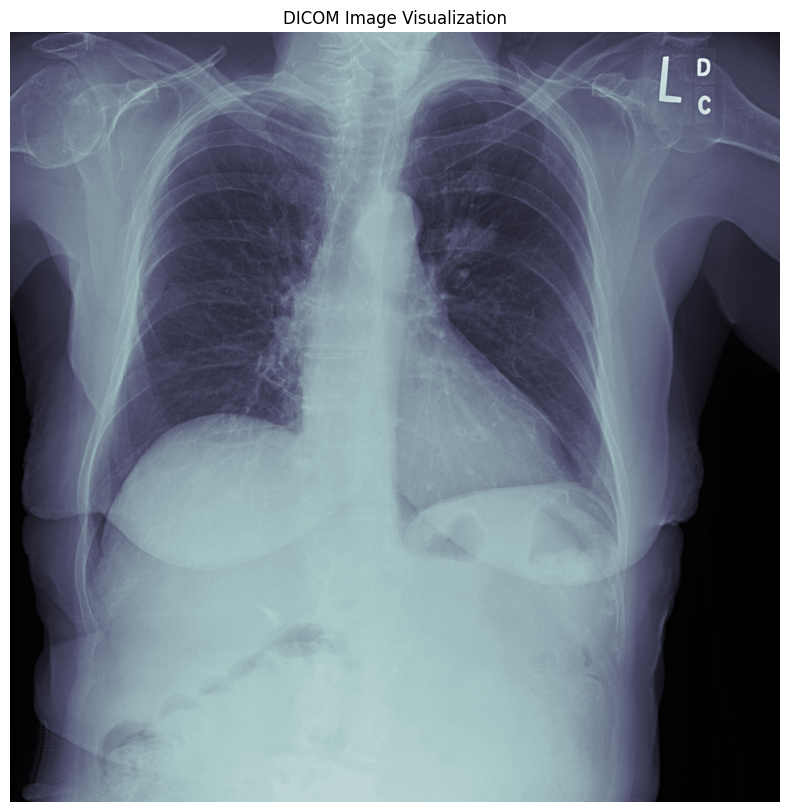


--- DICOM Metadata ---
Manufacturer Model: Revolution XQi ADS_28.2
Patient Name: 
Modality: DX


In [2]:
import pydicom as dicom
import matplotlib.pyplot as plt
import gdown
import os

# 2. Download the zip archive containing sample DICOM images
# We check if the folder exists first to avoid re-downloading
if not os.path.isdir("Sampledata_5A"):
    print("Downloading sample DICOM data...")
    url = "https://drive.google.com/uc?export=download&confirm=pbef&id=1Mafu1sTobziya-n-MFCJeR8QftigKhDG"
    output = "Sampledata_5A.zip"
    gdown.download(url, output, quiet=False)

    # Unzip and clean up
    print("Unzipping data...")
    !unzip -q Sampledata_5A.zip
    os.remove("Sampledata_5A.zip")
    print("Download and extraction complete.")

# 3. Load a specific DICOM image from the downloaded folder
image_path = "/content/Sampledata_5A/Sample5_1.dcm"

try:
    ds = dicom.dcmread(image_path)

    # 4. Visualize the image using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.title("DICOM Image Visualization")
    plt.axis('off')
    plt.show()

    # 5. Print Metadata (Tags)
    print("\n--- DICOM Metadata ---")

    # Manufacturer Model Name
    if 'ManufacturerModelName' in ds:
        print(f"Manufacturer Model: {ds.ManufacturerModelName}")
    else:
        print("Manufacturer Model: Not available in this file")

    # Patient Name (Tag 0x10, 0x10)
    # Note: accessing by tag number
    print(f"Patient Name: {ds[0x10, 0x10].value}")

    # Modality (Type of scan, e.g., CT, MR)
    print(f"Modality: {ds.Modality}")

except FileNotFoundError:
    print(f"Error: The file {image_path} was not found. Please check the download step.")